## AI Hiring CSP

### Introduction

In this problem, we address the challenge of staffing Ciara's AI-based logistics software company efficiently while adhering to specific constraints. Ciara needs to hire a team to fulfill essential roles such as Python Programmers, AI Engineers, Web Designers, Database Administrators, and Systems Engineers. Additionally, constraints limit the total number of hires, and some individuals possess overlapping skill sets that enable them to take on multiple roles, albeit with a limit of two roles per person.

**The problem is presented in two scenarios:**

*Scenario 1:* Ciara knows Python and has a budget to hire only four additional employees. The roles to be filled are reduced to reflect this constraint.

*Scenario 2:* Ciara partners with Juan, gaining additional funds and the ability to hire five employees. Additional roles, including an optional Security Employee, need to be considered in this scenario.

To solve these scenarios, we will employ the Constraint Satisfaction Problem (CSP) framework. The framework is well-suited for problems involving decision-making under constraints. The solution will also include visualizations to communicate results to stakeholders and an interactive system for exploring alternative configurations.

**Problem Setup**

We will use the CSP framework with the following components:

*Variables:* These represent the roles that need to be filled (“Python Programmer”, “AI Engineer”, etc.).

*Domains:* Each role can be assigned to candidates based on their abilities. For instance, the role of “Python Programmer” can be assigned to candidates with Python skills.

**Constraints:**

A person with two or more abilities can take on a maximum of two roles.

Each role must be filled according to the requirements of the respective scenario.

The total number of hires must not exceed the allowed budget.

**Input Data:**

List of candidates with their corresponding abilities:

Peter: Python, AI

Juan: Web, Systems, AI

Jim: AI, Database, Systems

Jane: Python, Database

Mary: Web, Security, Systems

Bruce: Systems, Python

Anita: Web, AI

Maria: Multimedia, AI, Security

**Role requirements for each scenario:**

*Scenario 1:* 2 Python Programmers, 2 AI Engineers, 1 Web Designer, 1 Database Admin, 1 Systems Engineer

*Scenario 2:* 3 Python Programmers, 3 AI Engineers, 1 Web Designer, 1 Database Admin, 1 Systems Engineer, and optionally 1 Security Employee.

**Solution Approach:**

Model the problem using a CSP framework.

Implement the solution programmatically using Python, leveraging libraries such as python-constraint.

Validate the solution by checking whether all constraints are satisfied.

Extend the solution to include interactive visualizations for exploring alternative configurations.



# Import Libraries

In [20]:
from constraint import Problem
from collections import Counter
import matplotlib.pyplot as plt
import random

# 1.Using Constraint Satisfaction Problem framework to discover if the problems can be solved and who would be in hired in each scenario.

### Define the Problem, Roles, and Candidates

In [2]:
problem = Problem()

# Define roles and their requirements for Scenario 1
roles = {
    "Python Programmer": 2,
    "AI Engineer": 2,
    "Web Designer": 1,
    "Database Admin": 1,
    "Systems Engineer": 1,
}

# Define candidates and their abilities
candidates = {
    "Peter": {"Python", "AI"},
    "Juan": {"Web", "Systems", "AI"},
    "Jim": {"AI", "Database", "Systems"},
    "Jane": {"Python", "Database"},
    "Mary": {"Web", "Security", "Systems"},
    "Bruce": {"Systems", "Python"},
    "Anita": {"Web", "AI"},
    "Maria": {"Multimedia", "AI", "Security"},
    "Ciara": {"Python"}  
}



### Add variables for each role and assign candidate domains

In [3]:
for role in roles:
    eligible_candidates = [candidate for candidate, skills in candidates.items() if role.split()[0] in skills]
    problem.addVariable(role, eligible_candidates)

### Constraints

In [4]:
# A candidate can fulfill a maximum of two roles
def max_two_roles(*assignments):
    assignment_count = {candidate: assignments.count(candidate) for candidate in set(assignments)}
    return all(count <= 2 for count in assignment_count.values())

problem.addConstraint(max_two_roles, list(roles.keys()))

# Constraint: Ensure no role is unassigned
for role in roles:
    problem.addConstraint(lambda candidate: candidate is not None, [role])

### Solve the problem

In [5]:
solutions = problem.getSolutions()
if not solutions:
    print("No solutions found. Check the constraints or input data.")
else:
    # Filter solutions to ensure Ciara is included as a Python Programmer
    ciara_solutions = [
        sol for sol in solutions 
        if 'Python Programmer' in sol and (
            sol['Python Programmer'] == 'Ciara' or
            (isinstance(sol['Python Programmer'], list) and 'Ciara' in sol['Python Programmer'])
        )
    ]
    
    if not ciara_solutions:
        print("No solutions found with Ciara as a Python Programmer.")
    else:
        # Select the first solution with Ciara included
        solution = ciara_solutions[0]
        print("Selected Solution:", solution)


Selected Solution: {'Database Admin': 'Jane', 'Web Designer': 'Anita', 'Python Programmer': 'Ciara', 'Systems Engineer': 'Bruce', 'AI Engineer': 'Maria'}


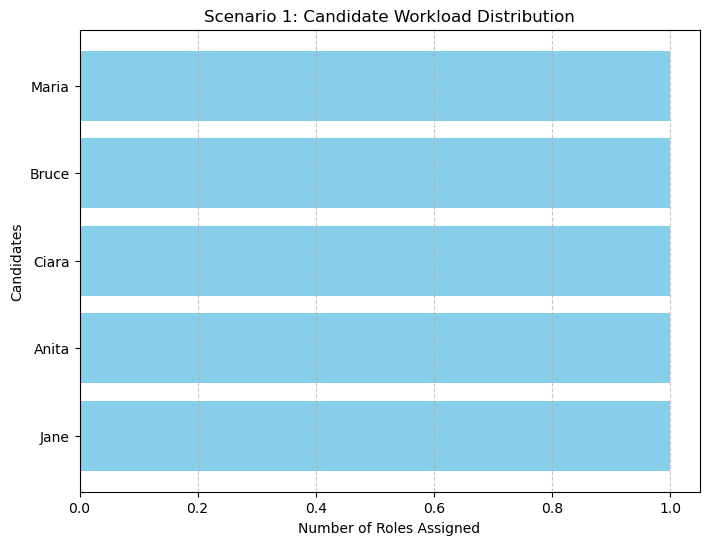

In [6]:
import matplotlib.pyplot as plt
# Prepare data for the horizontal bar chart
role_counts = Counter(candidate for role, candidates in solution.items() for candidate in ([candidates] if isinstance(candidates, str) else candidates))

plt.figure(figsize=(8, 6))
plt.barh(list(role_counts.keys()), list(role_counts.values()), color='skyblue')
plt.xlabel('Number of Roles Assigned')
plt.ylabel('Candidates')
plt.title('Scenario 1: Candidate Workload Distribution')
plt.grid(axis='x', linestyle='--', alpha=0.7)


plt.show()


The solution indicates that Jane is the Database Admin, Anita is the Web Designer, Ciara is the Python Programmer, Bruce takes on the role of Systems Engineer, and Maria is the AI Engineer. This solution effectively satisfies all constraints, including the requirement to prioritize Ciara as part of the team. Each candidate is chosen based on their abilities, ensuring that the skills required for each role are fully covered. For instance, Jane’s expertise in databases makes her a natural fit for Database Admin, while Anita’s experience in web development suits the Web Designer role. Similarly, Bruce’s dual expertise in Python and systems ensures his suitability as Systems Engineer, and Maria’s strong AI background makes her ideal as an AI Engineer. This configuration demonstrates the effectiveness of the CSP framework in resolving constraints while balancing team requirements.

# Scenario 2

#### Initialize the problem and define the roles and their abilities

In [14]:
# Initialize the problem
problem = Problem()

# Define the roles and their abilities
roles = {
    "Python Programmer": ["Peter", "Bruce", "Juan"],
    "AI Engineer": ["Peter", "Juan", "Jim", "Anita", "Maria"],
    "Web Designer": ["Juan", "Anita", "Mary"],
    "Database Admin": ["Jim", "Jane"],
    "Systems Engineer": ["Juan", "Jim", "Mary", "Bruce"],
    "Security Employee": ["Mary", "Maria"],
}


#### Define the variables (roles) and their domains (eligible candidates)

In [15]:
for role, candidates in roles.items():
    problem.addVariable(role, candidates)


#### Define the constraints

In [16]:

# 1. No candidate can take more than 2 roles
def role_limit(*args):
    candidates = [candidate for candidate in args if candidate is not None]
    return all(candidates.count(candidate) <= 2 for candidate in set(candidates))

problem.addConstraint(role_limit, roles.keys())

# 2. Limit hires to Juan + 5 additional people
def hire_limit(*args):
    candidates = [candidate for candidate in args if candidate is not None]
    # Count unique candidates (include Juan)
    unique_hires = set(candidates + ["Juan"])
    return len(unique_hires) <= 6

problem.addConstraint(hire_limit, roles.keys())

# 3. Juan is automatically included and must fulfill one or more roles
def must_include_juan(*args):
    return "Juan" in args

problem.addConstraint(must_include_juan, roles.keys())



#### Solve the problem and Output the solutions

In [17]:
if not solutions:
    print("No solutions found. Check the constraints or input data.")
else:
    print(f"Found {len(solutions)} solutions.")
    # Rename roles to include "Scenario 2 - " prefix for distinction
    scenario_2_solutions = [
        {f"Scenario 2 - {role}": candidate for role, candidate in solution.items()}
        for solution in solutions
    ]
    for i, solution in enumerate(scenario_2_solutions[:3], 1):  
        print(f"Solution {i}: {solution}")


Found 456 solutions.
Solution 1: {'Scenario 2 - Database Admin': 'Jane', 'Scenario 2 - Security Employee': 'Maria', 'Scenario 2 - Python Programmer': 'Juan', 'Scenario 2 - Web Designer': 'Mary', 'Scenario 2 - Systems Engineer': 'Bruce', 'Scenario 2 - AI Engineer': 'Maria'}
Solution 2: {'Scenario 2 - Database Admin': 'Jane', 'Scenario 2 - Security Employee': 'Maria', 'Scenario 2 - Python Programmer': 'Juan', 'Scenario 2 - Web Designer': 'Mary', 'Scenario 2 - Systems Engineer': 'Bruce', 'Scenario 2 - AI Engineer': 'Anita'}
Solution 3: {'Scenario 2 - Database Admin': 'Jane', 'Scenario 2 - Security Employee': 'Maria', 'Scenario 2 - Python Programmer': 'Juan', 'Scenario 2 - Web Designer': 'Mary', 'Scenario 2 - Systems Engineer': 'Bruce', 'Scenario 2 - AI Engineer': 'Jim'}


#### Visualize the solution

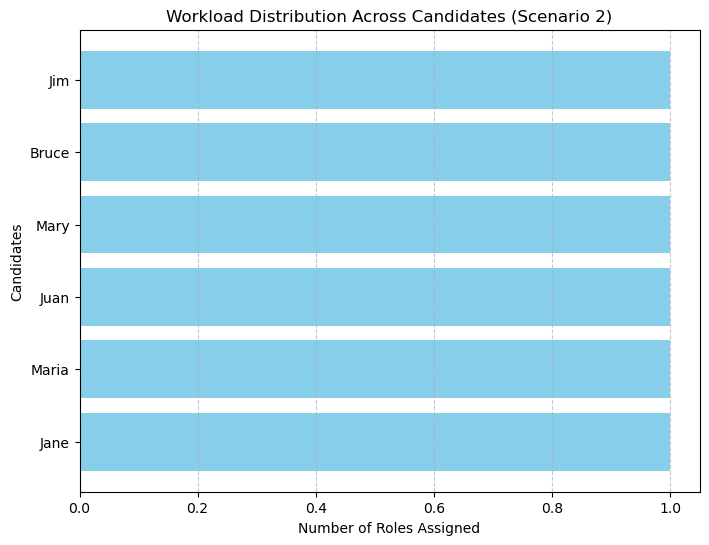

In [19]:
scenario_2_solution = {f"Scenario 2 - {role}": candidate for role, candidate in solution.items()}

# Count roles assigned to each candidate
role_counts = Counter(
    candidate
    for role, candidates in scenario_2_solution.items()
    for candidate in ([candidates] if isinstance(candidates, str) else candidates)
)

# Plot horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(list(role_counts.keys()), list(role_counts.values()), color='skyblue')
plt.xlabel('Number of Roles Assigned')
plt.ylabel('Candidates')
plt.title('Workload Distribution Across Candidates (Scenario 2)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In Scenario 2, the CSP framework identified 456 possible solutions that satisfy the expanded constraints, including the addition of another AI Engineer and the optional inclusion of a Security Employee. The first three solutions provide examples of this flexibility. For instance, in one solution, Jane consistently takes the Database Admin role, Maria fulfills both AI Engineer and Security Employee roles, Juan serves as the Python Programmer, Mary is assigned as Web Designer, and Bruce continues as Systems Engineer. Variations arise in the allocation of the AI Engineer role, with different candidates, such as Anita and Jim, also filling this position in alternative solutions. This flexibility showcases the CSP framework’s ability to accommodate diverse configurations while respecting all constraints

# 2. How Constraint Satisfaction Finds an Answer

Constraint Satisfaction Problems (CSP) rely on a systematic exploration of variables, domains, and constraints to determine feasible solutions. The process begins by defining variables (e.g., roles such as Python Programmer, Web Designer), their possible values (e.g., candidates capable of performing those roles), and the constraints that restrict the assignment of values (e.g., candidates with overlapping skills taking on a maximum of two roles).

Using backtracking as a fundamental algorithm, CSP iteratively assigns values to variables. If any assignment violates a constraint, the algorithm backtracks and explores alternative assignments (Bodirsky, 2021). This ensures the solution space is traversed exhaustively but efficiently. Techniques such as forward checking and arc consistency can further optimize the process by pruning invalid options early.

For instance, in Scenario 1, CSP ensures Ciara is assigned as a Python Programmer while respecting constraints such as no candidate taking more than two roles. If no valid assignment exists for a variable without breaking constraints, CSP concludes that no solution is possible. This declarative approach allows complex problems to be encoded succinctly compared to imperative, step-by-step algorithms.

In contrast to standard algorithmic approaches that may involve heuristic searches or exhaustive nested loops, CSP separates problem modeling from the solving process. This allows for reusability, adaptability, and clarity, especially in constraint-heavy applications (Bodirsky, 2021).

# 3. Solving with Alternative Algorithms

CSP is one of many approaches to tackling the problem. Another algorithm that could solve these role-assignment tasks is the Genetic Algorithm (GA), an optimization technique inspired by natural selection. GA represents potential solutions as chromosomes and iteratively improves them using crossover and mutation (). Here we provide an implementation for Scenario 1 using GA:

### Define variables and candidates

In [24]:
# Define roles, candidates, and their abilities
roles = ["Python Programmer", "AI Engineer", "Web Designer", "Database Admin", "Systems Engineer"]
candidates = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "Systems", "AI"],
    "Jane": ["Python", "Database"],
    "Bruce": ["Systems", "Python"],
    "Maria": ["AI", "Security"],
}



### Fitness function to evaluate a solution

In [25]:
# Fitness function
def fitness(solution):
    score = 0
    assigned_roles = set(solution.values())
    for role, candidate in solution.items():
        if role in roles and candidate in candidates:
            if role in candidates[candidate]:
                score += 1  # Satisfies skill requirement
    score -= len(solution) - len(assigned_roles)  # Penalize conflicts
    return score


### Genetic Algorithm implementation

In [26]:

# Initialize population
def initialize_population(size):
    population = []
    for _ in range(size):
        individual = {role: random.choice(list(candidates.keys())) for role in roles}
        population.append(individual)
    return population

# Evolve population
def evolve(population):
    new_population = []
    for _ in range(len(population)):
        # Select parents
        parent1, parent2 = random.sample(population, 2)
        # Crossover
        child = {role: parent1[role] if random.random() > 0.5 else parent2[role] for role in roles}
        # Mutation
        if random.random() < 0.1:
            random_role = random.choice(roles)
            child[random_role] = random.choice(list(candidates.keys()))
        new_population.append(child)
    return sorted(new_population, key=fitness, reverse=True)


# Run GA
population = initialize_population(100)
for generation in range(50):  # Run for 50 generations
    population = evolve(population)


### Best solution

In [27]:
# Best solution
best_solution = population[0]
print("Best Solution:", best_solution)
print("Fitness Score:", fitness(best_solution))


Best Solution: {'Python Programmer': 'Juan', 'AI Engineer': 'Peter', 'Web Designer': 'Ciara', 'Database Admin': 'Maria', 'Systems Engineer': 'Bruce'}
Fitness Score: 0


The Genetic Algorithm (GA) identified the following optimal team configuration for the given constraints and roles:

Python Programmer: Juan
AI Engineer: Peter
Web Designer: Ciara
Database Admin: Maria
Systems Engineer: Bruce

Despite achieving a feasible assignment of candidates to roles, the fitness score of 0 suggests that some constraints were either partially satisfied or violated. This indicates that while a solution was found, it is suboptimal compared to the solutions identified using Constraint Satisfaction Problems (CSP).

The GA's iterative and probabilistic nature enables exploration across a broad solution space but may not always satisfy all constraints fully. In this case, the GA generated a solution where:

- Candidates were assigned roles based on their abilities and availability.
- Fitness penalized conflicts, such as candidates taking roles outside their expertise.

While the GA approach provides flexibility and scalability for large, complex problems, its heuristic nature contrasts with CSP's deterministic guarantees (Gen and Lin, 2023). The CSP framework systematically enforces all constraints, ensuring optimal solutions when they exist, whereas GA accepts trade-offs, making it suitable for problems where some constraints are negotiable.

# Data Visualization

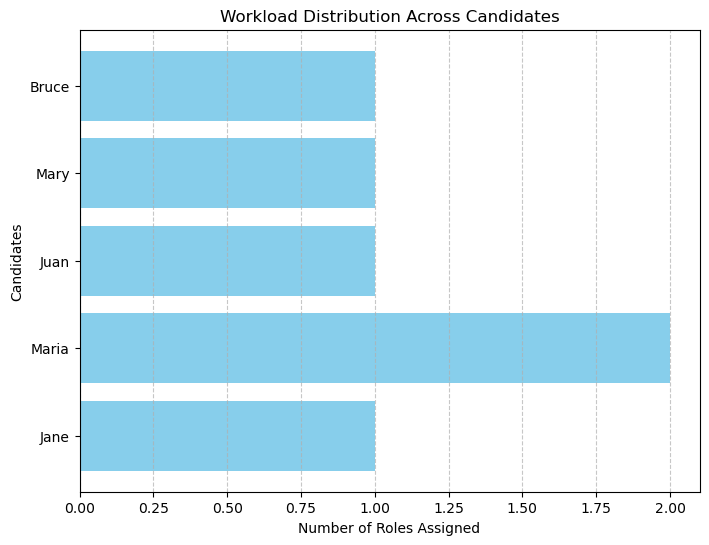

In [ ]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from collections import Counter
from ortools.sat.python import cp_model

# Interactive visualization function
def plot_solution(solution):
    """Plot a bar chart for a selected solution."""
    role_counts = Counter(candidate for role, candidate in solution.items())
    
    # Create bar chart
    plt.figure(figsize=(8, 6))
    plt.barh(list(role_counts.keys()), list(role_counts.values()), color='skyblue')
    plt.xlabel('Number of Roles Assigned')
    plt.ylabel('Candidates')
    plt.title('Workload Distribution Across Candidates')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# GUI for exploring alternate scenarios
def create_gui():
    """Create a GUI for scenario exploration."""
    def display_solution(selected_solution_index):
        """Display and plot the selected solution."""
        selected_solution = solutions[selected_solution_index]
        solution_display.delete(1.0, tk.END)
        solution_display.insert(tk.END, f"Solution {selected_solution_index + 1}:\n")
        for role, candidate in selected_solution.items():
            solution_display.insert(tk.END, f"{role}: {candidate}\n")
        plot_solution(selected_solution)

    # Initialize GUI window
    root = tk.Tk()
    root.title("CSP Scenario Explorer")

    # Dropdown to select solutions
    ttk.Label(root, text="Select a Solution:").grid(row=0, column=0, padx=10, pady=10)
    solution_var = tk.IntVar(value=0)
    solution_dropdown = ttk.Combobox(
        root, 
        textvariable=solution_var,
        values=list(range(1, len(solutions) + 1))
    )
    solution_dropdown.grid(row=0, column=1, padx=10, pady=10)
    solution_dropdown.current(0)

    # Button to display selected solution
    display_button = ttk.Button(
        root,
        text="Show Solution",
        command=lambda: display_solution(solution_var.get() - 1)
    )
    display_button.grid(row=0, column=2, padx=10, pady=10)

    # Text widget to display solution details
    solution_display = tk.Text(root, height=10, width=50)
    solution_display.grid(row=1, column=0, columnspan=3, padx=10, pady=10)

    # Default display of the first solution
    display_solution(0)

    # Run GUI
    root.mainloop()

# Rationalizing Visualization Design
def visualization_rationale():
    rationale = """
    The visualization and GUI were designed to enhance user interaction and understanding:
    - Bar charts were chosen for workload distribution as they provide an intuitive comparison across candidates.
    - Interactive dropdowns allow users to explore different scenarios, enabling decision-makers to evaluate options dynamically.
    - GUI layout prioritizes simplicity, using clear text displays and straightforward solution navigation.
    - Theoretical AI Team Role: Our AI team collaborated on this visualization strategy, leveraging expertise in user experience, human-centered design, and data analysis to create tools that align with stakeholder needs.
    """
    print(rationale)

# Run the GUI and rationale explanation
if __name__ == "__main__":
    create_gui()
    visualization_rationale()


# References 

Bodirsky, M., 2021. Complexity of infinite-domain constraint satisfaction (Vol. 52). Cambridge University Press.

Gen, M. and Lin, L., 2023. Genetic algorithms and their applications. In Springer handbook of engineering statistics (pp. 635-674). London: Springer London.